In [1]:
import torch

import d2l.torch as d2l
import numpy as np

In [2]:
SEED = 1234

In [3]:
def init_seed():
    np.random.seed(SEED)
    torch.random.manual_seed(SEED)

In [12]:
class MyModel(d2l.Module):
    def __init__(self, n_inputs, n_outputs, lr=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, 0.01, size=(n_inputs, n_outputs), requires_grad=True)
        self.B = torch.zeros(n_outputs, requires_grad=True)
        
    def parameters(self):
        return [self.W, self.B]
    
    def _softmax(self, data):
        return torch.nn.functional.softmax(data, dim=1)
        
    def forward(self, X):
        X_ = X.reshape(X.shape[0], -1)
        y = torch.matmul(X_, self.W) + self.B
        return self._softmax(y)

    def loss(self, y, y_target):
        y_hat = y[range(y_target.shape[0]), y_target.flatten()]
        return -torch.log(y_hat).mean()

In [13]:
init_seed()

In [14]:
fashion_mnist = d2l.FashionMNIST()
dlr_train = fashion_mnist.get_dataloader(train=True)

In [15]:
# X, y = next(iter(dlr_train))

In [16]:
mdl = MyModel(n_inputs=784, n_outputs=10)

In [17]:
# mdl(X_)

In [18]:
trainer = d2l.Trainer(1)

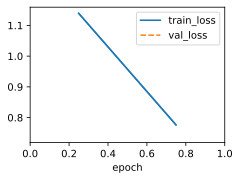

In [19]:
trainer.fit(mdl, fashion_mnist)